<a href="https://colab.research.google.com/github/ARYANSRIVATSAVA/Aryan/blob/main/mosaic-freeman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal as sg
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import skimage
import matplotlib.image as mpimg
import cv2
def image_read(image_path):
    image = cv2.imread(image_path) 
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
    return image.astype(np.float32)
def image_read_rgb(image_path):
    image = cv2.imread(image_path) 
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # ------> includes the conversion of color of the image with rgb
    return image.astype(np.float32)

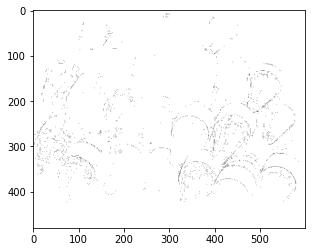

In [36]:
mosaic_image = image_read('/content/crayons.bmp')
plt.imshow(mosaic_image.astype(np.float32))

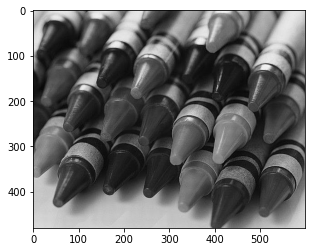

In [37]:
plt.imshow(mosaic_image.astype(np.uint8))

In [38]:
def linear_interpolation(mosaic_image):
   
    shape = np.shape(mosaic_image)
    image = np.zeros((shape[0], shape[1], 3))
    #Kernel weights
    Red_kernel = np.array([[1/4,2/4,1/4],[2/4,4/4,2/4],[1/4,2/4,1/4]]) 
    Green_kernel = np.array([[0/4,1/4,0/4],[1/4,4/4,1/4],[0/4,1/4,0/4]]) 
    Blue_kernel = np.array([[1/4,2/4,1/4],[2/4,4/4,2/4],[1/4,2/4,1/4]])
        
    Channel_r = mosaic_image[:,:,0]*np.tile(np.array([[1.0,0.0], [0.0,0.0]]),[int(shape[0]/2),int(shape[1]/2)]) #red filter       
    Channel_g = mosaic_image[:,:,1]*np.tile(np.array([[0.0,1.0], [1.0,0.0]]),[int(shape[0]/2),int(shape[1]/2)]) #green filter 
    Channel_b = mosaic_image[:,:,2]*np.tile(np.array([[0.0,0.0], [0.0,1.0]]),[int(shape[0]/2),int(shape[1]/2)]) #blue filter
    
    mosaic_image[:,:,0] = scipy.ndimage.convolve(Channel_r,Red_kernel,mode='constant')
    mosaic_image[:,:,1] = scipy.ndimage.convolve(Channel_g,Green_kernel,mode='constant')
    mosaic_image[:,:,2] = scipy.ndimage.convolve(Channel_b,Blue_kernel,mode='constant')
            
    return mosaic_image

In [39]:
def error(mosaic_image, original_image):

    squared_error = np.sum((mosaic_image[:,:,0:3]-original_image[:,:,0:3])**2, axis = 2)
    plt.figure(figsize=(16,8))
    plt.imshow(squared_error.astype(np.uint8),cmap = 'gray')
    plt.title('Squared error')
    average_error = np.mean(squared_error)
    maximum_error = squared_error.max()
    plt.colorbar()
  
    return average_error, maximum_error

Text(0.5, 1.0, 'Original Image')

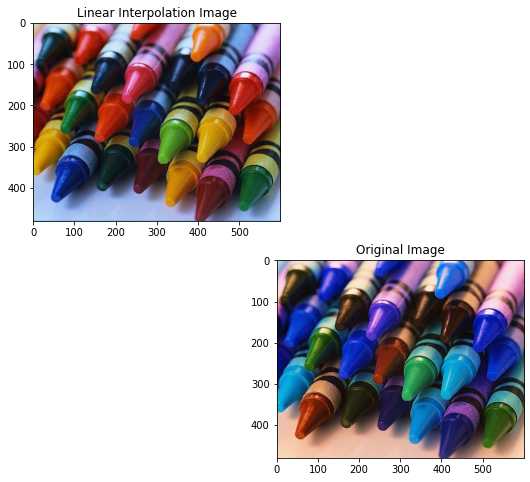

In [40]:
mosaic1_image = image_read('/content/crayons.bmp')
output1_image = linear_interpolation(mosaic1_image)
original_image = image_read('/content/crayons.jpg')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(output1_image.astype(np.uint8))
plt.title('Linear Interpolation Image')
plt.subplot(2,1,2)
plt.imshow(original_image.astype(np.uint8))
plt.title('Original Image')

Average per-pixel error: 15196.542
Maximum per-pixel error: 115386.31


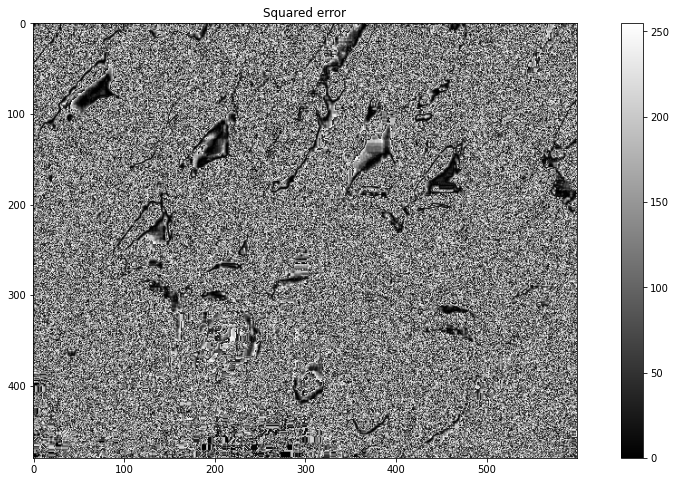

In [41]:
average_error, maximum_error = error(mosaic1_image, original_image)
print("Average per-pixel error: "+str(average_error))
print("Maximum per-pixel error: "+str(maximum_error))

Text(0.5, 1.0, 'Original Image')

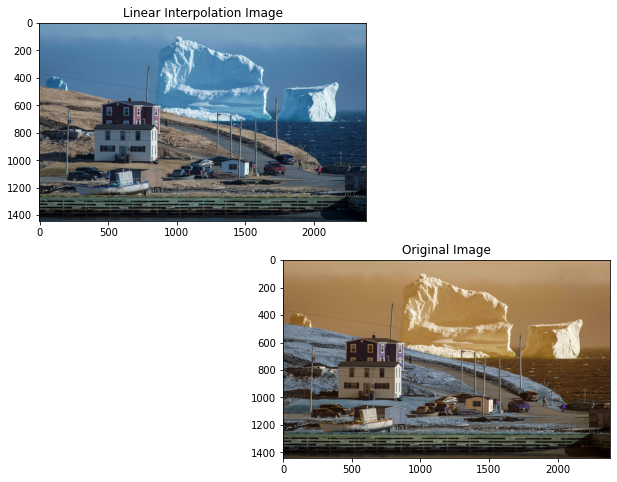

In [73]:
mosaic2_image = image_read('/content/iceberg.bmp')
output2_image = linear_interpolation(mosaic2_image)
original_image = image_read('/content/iceberg.jpg')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(output2_image.astype(np.uint8))
plt.title('Linear Interpolation Image')
plt.subplot(2,1,2)
plt.imshow(original_image.astype(np.uint8))
plt.title('Original Image')

Average per-pixel error: 7056.567
Maximum per-pixel error: 61787.25


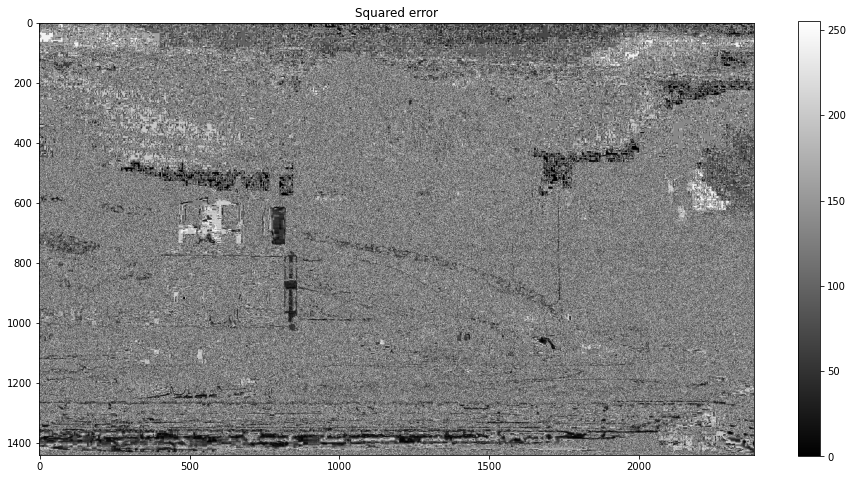

In [74]:
average_error, maximum_error = error(mosaic2_image, original_image)
print("Average per-pixel error: "+str(average_error))
print("Maximum per-pixel error: "+str(maximum_error))

Text(0.5, 1.0, 'Original Image')

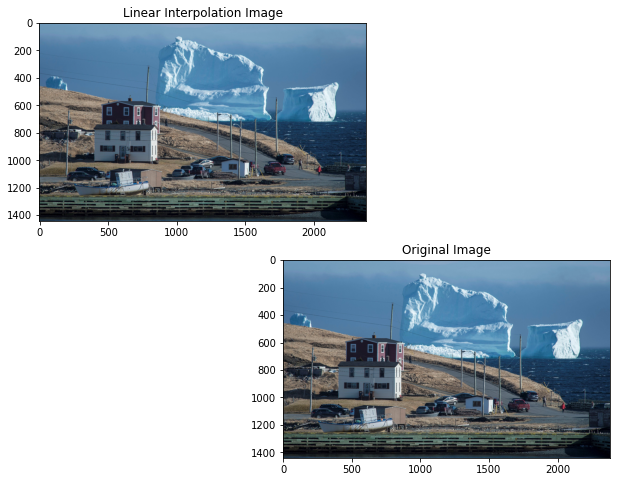

In [75]:
mosaic2_image = image_read_rgb('/content/iceberg.bmp')
output2_image = linear_interpolation(mosaic2_image)
original_image = image_read_rgb('/content/iceberg.jpg')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(output2_image.astype(np.uint8))
plt.title('Linear Interpolation Image')
plt.subplot(2,1,2)
plt.imshow(original_image.astype(np.uint8))
plt.title('Original Image')

Average per-pixel error: 114.244774
Maximum per-pixel error: 30379.812


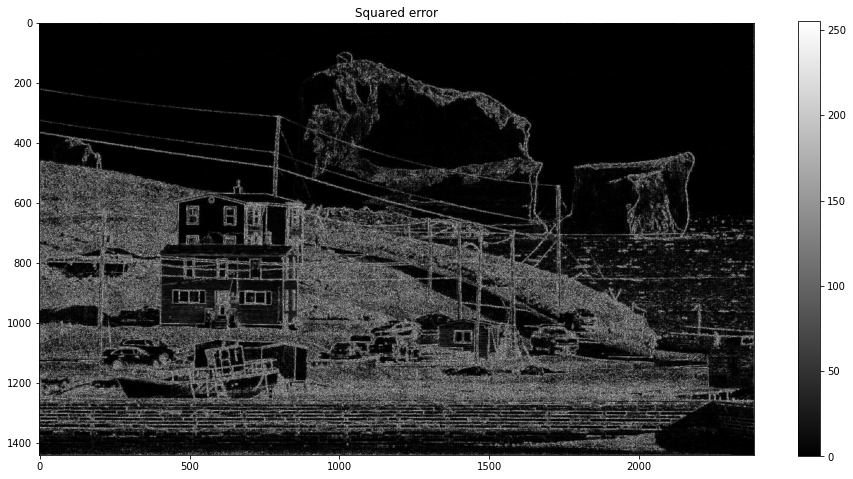

In [76]:
average_error, maximum_error = error(mosaic2_image, original_image)
print("Average per-pixel error: "+str(average_error))
print("Maximum per-pixel error: "+str(maximum_error))

Text(0.5, 1.0, 'Original Image')

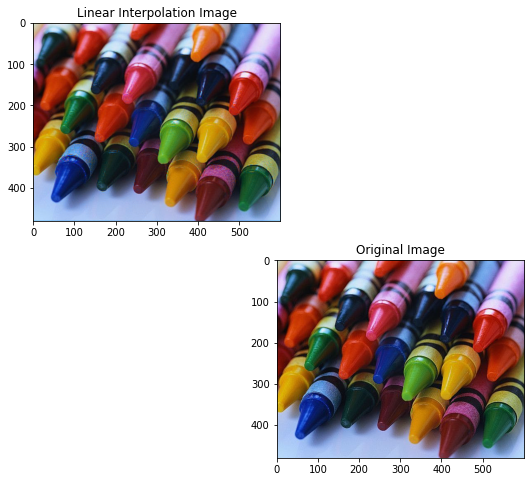

In [77]:
mosaic1_image = image_read_rgb('/content/crayons.bmp')
output1_image = linear_interpolation(mosaic1_image)
original_image = image_read_rgb('/content/crayons.jpg')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(output1_image.astype(np.uint8))
plt.title('Linear Interpolation Image')
plt.subplot(2,1,2)
plt.imshow(original_image.astype(np.uint8))
plt.title('Original Image')

Average per-pixel error: 203.22368
Maximum per-pixel error: 53345.125


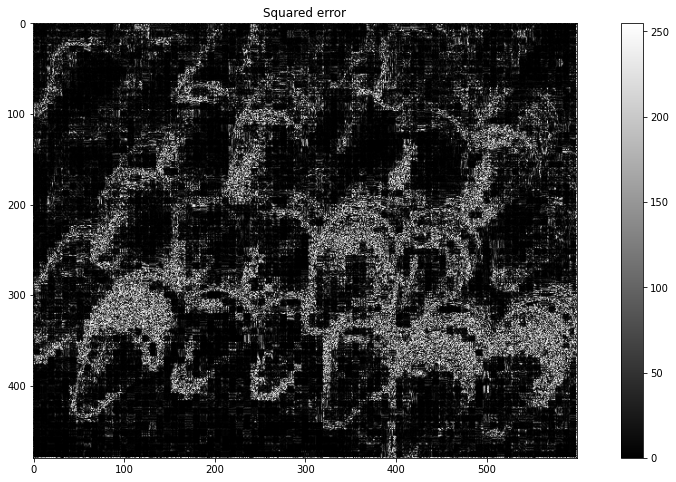

In [78]:
average_error, maximum_error = error(mosaic1_image, original_image)
print("Average per-pixel error: "+str(average_error))
print("Maximum per-pixel error: "+str(maximum_error))

In [79]:
#we got the countours after using the image_read_rgb function which actually includes the rgb color filter while reading

In [80]:
def freeman_image(mosaic_image):

    output_image = linear_interpolation(mosaic_image) 
    
    output_image_channelred = output_image[:,:,0]
    output_image_channelgreen = output_image[:,:,1]
    output_image_channelblue = output_image[:,:,2]
    
    RG = output_image_channelred - output_image_channelgreen
    BG = output_image_channelblue - output_image_channelgreen
            
    RG = scipy.signal.medfilt2d(RG)
    BG = scipy.signal.medfilt2d(BG)
    
    R = RG + output_image_channelgreen
    B = BG + output_image_channelgreen
    G = output_image_channelgreen
    
    output_image = np.zeros([output_image.shape[0], output_image.shape[1],output_image.shape[2]])
    
    
    output_image[:,:,0] = R
    output_image[:,:,1] = G
    output_image[:,:,2] = B
    return output_image

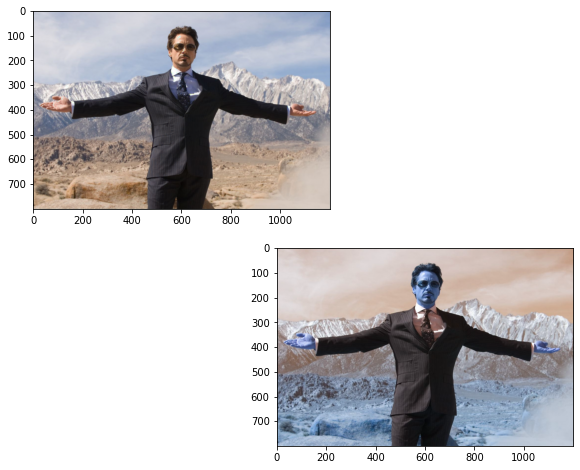

In [81]:
mosaic3_image = image_read('tony.bmp')
freeman1_image = freeman_image(mosaic3_image)
original_image = image_read('tony.jpg')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(freeman1_image.astype(np.uint8))
plt.subplot(2,1,2)
plt.imshow(original_image.astype(np.uint8))

Average per-pixel error: 1911.4924856119792
Maximum per-pixel error: 35881.8125


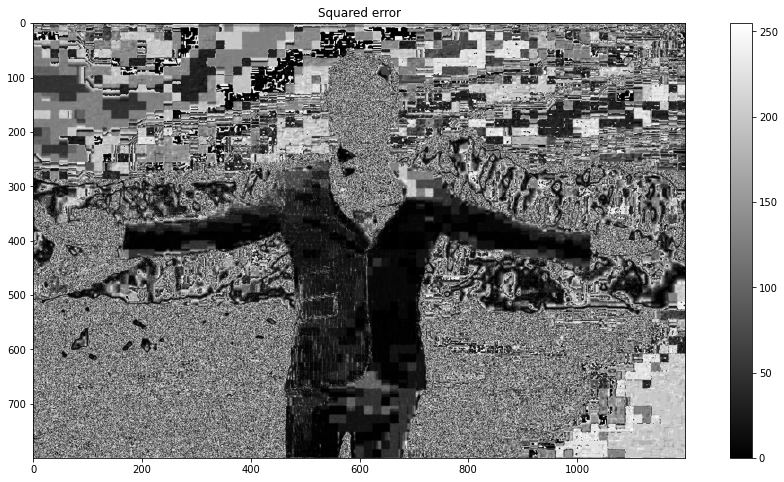

In [82]:
average_error, maximum_error = error(freeman1_image, original_image)
print("Average per-pixel error: "+str(average_error))
print("Maximum per-pixel error: "+str(maximum_error))

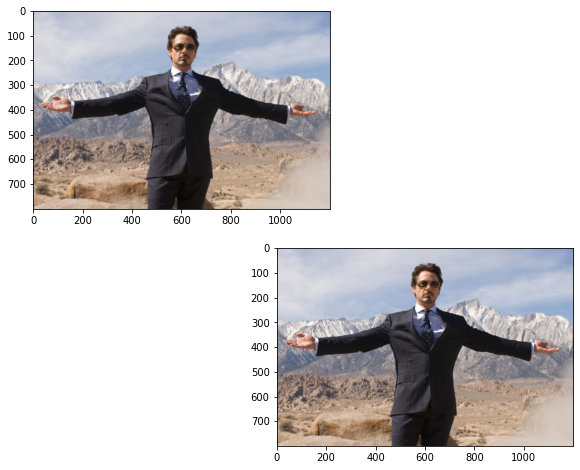

In [83]:
mosaic3_image = image_read_rgb('tony.bmp')
freeman2_image = freeman_image(mosaic3_image)
original_image = image_read_rgb('tony.jpg')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.imshow(freeman2_image.astype(np.uint8))
plt.subplot(2,1,2)
plt.imshow(original_image.astype(np.uint8))

Average per-pixel error: 28.5263017578125
Maximum per-pixel error: 32278.0


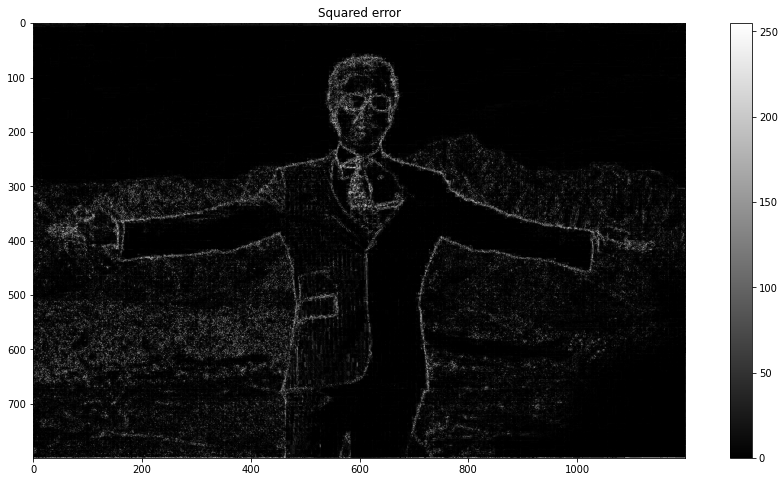

In [84]:
average_error, maximum_error = error(freeman2_image, original_image)
print("Average per-pixel error: "+str(average_error))
print("Maximum per-pixel error: "+str(maximum_error))

In [85]:
#we got the countours again after using the image_read_rgb function which actually includes the rgb color filter while reading

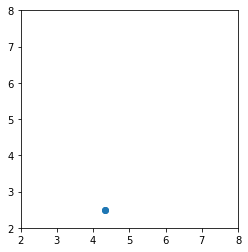

In [86]:
from matplotlib import projections
# 3D cube coordinates in the world coordinate frame 
cube_coordinates = np.array([[0, 0, 0],[1, 0, 0],[1, 1, 0],
                             [0, 1, 0],[0, 0, 1],[1, 0, 1],
                             [1, 1, 1],[0, 1, 1],])

C = np.array([0, 1, -10])  # Xc,Yc,Zc - position of the camera
#rotation_angle = np.deg2rad(30) 
Rotation_matrix = np.array([
    [np.cos(np.deg2rad(30)), -np.sin(np.deg2rad(30)), 0],
    [np.sin(np.deg2rad(30)), np.cos(np.deg2rad(30)), 0],
    [0, 0, 1]])

f = 5  # focal length
k = np.array([[f, 0, 0],[0, f, 0], [0, 0, 1]])  

# extrinsic camera parameters
R = Rotation_matrix
projection = np.column_stack((R,-Rotation_matrix.dot(C)))  # stacking the r values with the t(after rotation)

# Projection
column_ones = np.ones(len(cube_coordinates))
Homogeneous_coordinates = np.column_stack((cube_coordinates, column_ones))  # 3D coordinates of the vertices (homogeneous)
projection_vector = projection.dot(Homogeneous_coordinates.T)
coordinates = k.dot(projection_vector).T  # retrieving 2D coordinates in the image plane
x = coordinates[:, 0]
y = coordinates[:, 1]
# results 
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x, y)
ax.set_xlim(2, 8)
ax.set_ylim(2, 8)
plt.show()
